# Polynominal regression

In [10]:
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Default seaborn theme, scaling & color palette
import numpy as np

## Get the dataset

In [19]:
ans = sns.load_dataset('anscombe') 
x_2 = ans[ans.dataset == 'II']['x'].values 
y_2 = ans[ans.dataset == 'II']['y'].values 
y_2 = y_2 + np.random.normal(0, 1, len(y_2))
x_2 = x_2 - x_2.mean() 
y_2 = y_2 - y_2.mean()

## Build a simple quadratic model with Gaussian noise

In [20]:
model_poly = pm.Model()
with model_poly:
    alpha = pm.Normal('alpha', mu=0, sd=10) 
    beta1 = pm.Normal('beta1', mu=0, sd=1) 
    beta2 = pm.Normal('beta2', mu=0, sd=1) 
    epsilon = pm.Uniform('epsilon', lower=0, upper=10)
    
    mu = alpha + beta1 * x_2 + beta2 * x_2**2
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_2)

In [21]:
with model_poly:
    start = pm.find_MAP() 
    step = pm.NUTS(scaling=start)
    trace_poly = pm.sample(3000, step=step, start=start)

logp = -16.908, ||grad|| = 0.074942: 100%|██████████| 37/37 [00:00<00:00, 1035.81it/s] 
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/theano/scan_module/scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The f

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f787ef956d0>,
      dtype=object)

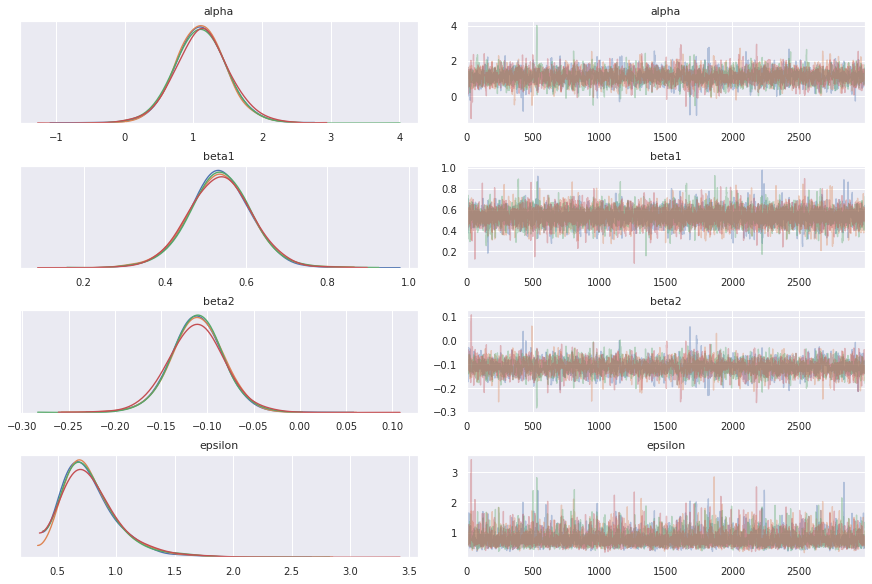

In [22]:
pm.traceplot(trace_poly)

## Use samples from the posterior to plot possible curves

Text(0, 0.5, '$y$')

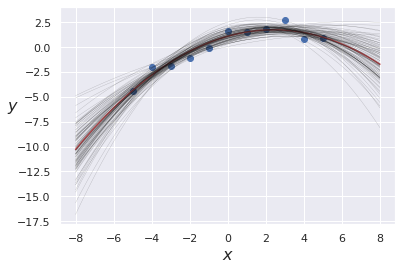

In [29]:
num_traces = 100

x_p = np.linspace(-8, 8)
y_p_best = trace_poly['alpha'].mean() + trace_poly['beta1'].mean() * x_p + trace_poly['beta2'].mean() * x_p**2 
plt.plot(x_p, y_p_best, c='r')
for i in range(num_traces):
    y_p = trace_poly['alpha'][-i] + trace_poly['beta1'][-i] * x_p + trace_poly['beta2'][-i] * x_p**2 
    plt.plot(x_p, y_p, c='k', alpha=0.3, linewidth=0.3)
plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=16) 
plt.ylabel('$y$', fontsize=16, rotation=0) 
